<a href="https://colab.research.google.com/github/Tysondgn/ML_Repository/blob/main/Bike_Prices_Prediction_using_Linear_Regression_(OLS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Price Prediction Using Linear Regression**

##**Import Library**

In [41]:
import pandas as pd
import numpy as np

##**Import CSV as DataFrame**

In [42]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Tysondgn/ML_Repository/main/Dataset/Bike%20Prices.csv')

##**Get the First Five Rows of DataFrame**

In [43]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


##**Get Information of DataFrame**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


##**Get Missing Value Drop**

In [45]:
df = df.dropna()

##**Get the Summary Statistics**

In [46]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


##**Get Categories and Counts of Categorical Variables**

In [47]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [48]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [49]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [50]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

##**Get Column Names**

In [51]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

##**Get Shape of DataFrame**

In [52]:
df.shape

(626, 8)

##**Get Encoding of Categorical Features**

In [53]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [54]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

##**Define y(dependent or label or target varible) and X(independent or features or attribute Varible)**

In [55]:
y = df['Selling_Price']

In [56]:
y.shape

(626,)

In [57]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [58]:
X = df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [59]:
X.shape

(626, 5)

In [60]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


##**Get Train Test Split**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=82529)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 5), (188, 5), (438,), (188,))

##**Get Modal Train**

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train, y_train)

LinearRegression()

##**Get Model Prediction**

In [67]:
y_pred = lr.predict(X_test)

In [68]:
y_pred.shape

(188,)

In [69]:
y_pred

array([ 49999.8803707 ,  48293.45926665,  54282.05987784,  59163.04677892,
        19457.95993564,  68272.14646425,   2475.10772823,  55454.31227858,
        53073.30605174,  25177.40209541,  12475.73631765,  65775.46312147,
        38776.06222707,  30288.52563989,  50847.49905632,  53971.40594036,
        20955.84890671,  48746.12555029,  29534.56241339,  63529.54116163,
        60957.95205134, 145881.44835322, 133589.62498156,   2148.00205394,
        13249.3424275 ,  21622.24471747,  72399.59551846,  26060.60746873,
        66018.03575256,  74868.32620708,  30373.8541519 ,  67902.0347656 ,
        58221.6167548 ,  75079.79800046,  50029.31838228, 132500.09691075,
        32682.17565166,  46527.08692679,  51706.29727614,  69963.71825879,
        27958.69410606,  87080.68630621, 117968.13186876,  22004.85635908,
       120319.89052547,  47199.39936227,  54022.33654582, 142180.40647514,
        51947.34476498,  68081.83002324,  52966.04889933,  68279.07487781,
        87855.77137654,  

##**Get Model Evaluation**

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
mean_squared_error(y_test,y_pred)

237922187.42604366

In [72]:
mean_absolute_error(y_test,y_pred)

11131.386782151389

In [73]:
r2_score(y_test,y_pred)

0.8687882389990469

##**Get Visualization of Actual Vs Predicted Results**

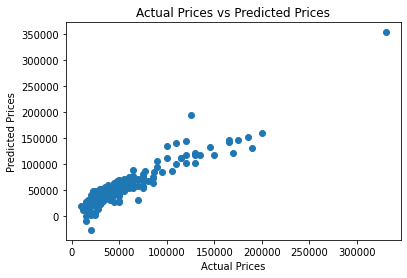

In [74]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

##**Get Future Predictions**

**lets select a random sample from existing dataset as new value**

Steps to follow

  1. Extract a random row using sample function
  2. Seperate X and y
  3. Predict

In [75]:
df_new = df.sample(1)

In [76]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
503,Bajaj,Bajaj Avenger 220,75000,2019,0,0,3500,95000.0


In [77]:
df_new.shape

(1, 8)

In [78]:
X_new = df_new.drop(['Brand','Model','Selling_Price'], axis = 1)

In [79]:
y_pred_new = lr.predict(X_new)

In [80]:
y_pred_new

array([84678.30271524])